In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
L = 0.12
L2 = 2 * L
Es = 200e9
d1 = 0.03
d2 = 0.02
J1 = d1**4 * np.pi / 64
J2 = d2**4 * np.pi / 64
EJ1 = Es * J1
EJ2 = Es * J2
q = -200
F = -1000
M = 2000

N = 21
x = np.linspace(0, L2, N)
h = x[1] - x[0]

k1 = np.array([
    [12/h**3, 6/h**2, -12/h**3, 6/h**2],
    [6/h**2, 4/h, -6/h**2, 2/h],
    [-12/h**3, -6/h**2, 12/h**3, -6/h**2],
    [6/h**2, 2/h, -6/h**2, 4/h]
])

b1 = q * np.array([
    h/2, h**2/12, h/2, -h**2/12
])

In [3]:
K = np.zeros([2*N, 2*N])
b = np.zeros(2*N)

for k in range(N-1):
    if k < (N-1) / 2:
        K[2*k:2*k+4, 2*k:2*k+4] += EJ1 * k1
        b[2*k:2*k+4] += b1
        pass
    else:
        K[2*k:2*k+4, 2*k:2*k+4] += EJ2 * k1
        pass
    pass

b[N-1] += F
b[-1] += -M

node_to_solve = [i for i in range(2, 2*N-2)]
node_to_solve.append(2*N-1)
node_to_solve = np.array(node_to_solve, dtype=int)

In [4]:
Km = (K[node_to_solve].T[node_to_solve]).T
bm = b[node_to_solve]
u = np.zeros(2*N)
u[node_to_solve] = np.linalg.inv(Km) @ bm
w = u[0:-1:2]
theta = u[1::2]

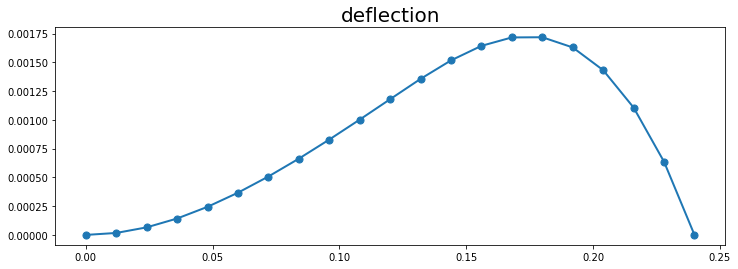

In [5]:
plt.figure(figsize=(12, 4), facecolor="white")
plt.plot(x, w, lw=2)
plt.scatter(x, w, s=50)
plt.title("deflection", fontsize=20)
plt.savefig("deflection.png", bbox_inches="tight")
plt.show()

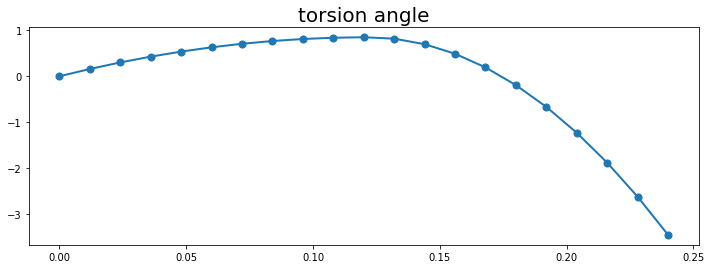

In [6]:
plt.figure(figsize=(12, 4), facecolor="white")
plt.plot(x, theta* 180 / np.pi, lw=2)
plt.scatter(x, theta * 180 / np.pi, s=50)
plt.title("torsion angle", fontsize=20)
plt.savefig("torsion_angle.png", bbox_inches="tight")
plt.show()